<a href="https://colab.research.google.com/github/felps2003/Vis-o-Computacional/blob/main/AutoEncoderNoMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoder é uma arquitetura de rede neural que é usada para codificar e decodificar dados de entrada. É uma técnica de aprendizado não supervisionado que permite que uma rede neural aprenda a representação latente de uma entrada e gere uma saída semelhante à entrada original.

O autoencoder é composto por duas partes principais: o codificador e o decodificador. O codificador recebe uma entrada e a transforma em uma representação latente de menor dimensionalidade, também conhecida como código ou vetor de características. O decodificador recebe esse código e tenta reconstruir a entrada original a partir dele.

Durante o treinamento, o autoencoder é alimentado com dados de entrada e é ajustado para minimizar a diferença entre a entrada original e a saída reconstruída. A rede neural é então capaz de aprender uma representação comprimida dos dados de entrada, o que pode ser útil em tarefas de redução de dimensionalidade, compressão de dados e reconstrução de imagens.

Os autoencoders são usados em várias aplicações, como compressão de imagens, reconstrução de imagens danificadas, detecção de anomalias em dados, entre outros.

In [3]:
# Importações importantes

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model 
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.utils import np_utils


In [4]:
# Carrega o conjunto de treinamento e teste do conjunto de dados MNIST usando a biblioteca Keras
# Atribuição múltipla é usada para descompactar os dados em duas tuplas, onde o segundo item de cada tupla é ignorado usando o sinal de sublinhado "_"
(X_train, _), (X_test, _) = mnist.load_data()

# Modifica o formato do conjunto de dados de treinamento "X_train" para uma matriz tridimensional usando a função "reshape()" do NumPy
# A dimensão original de "X_train" era (60000, 28, 28), que representa 60.000 imagens de tamanho 28 por 28 pixels
# Adiciona uma dimensão adicional de tamanho 1 para cada imagem, tornando o formato final da matriz (60000, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0],28,28,1)

# Modifica o formato do conjunto de dados de teste "X_test" para uma matriz tridimensional usando a função "reshape()" do NumPy
# A dimensão original de "X_test" era (10000, 28, 28), que representa 10.000 imagens de tamanho 28 por 28 pixels
# Adiciona uma dimensão adicional de tamanho 1 para cada imagem, tornando o formato final da matriz (10000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# Converte o tipo de dados do conjunto de treinamento "X_train" para float32 usando o método "astype()" do NumPy
# Normaliza os valores dos pixels dividindo-os por 255 para ter uma escala entre 0 e 1
X_train = X_train.astype('float32')/255

# Converte o tipo de dados do conjunto de teste "X_test" para float32 usando o método "astype()" do NumPy
# Normaliza os valores dos pixels dividindo-os por 255 para ter uma escala entre 0 e 1
X_test = X_test.astype('float32')/255

# Imprime a forma (dimensão) da matriz "X_train"
print('Formatado X_train:', X_train.shape)

# Imprime o número de amostras de treinamento na matriz "X_train"
print('Numero de amostras de treino:', X_train.shape[0])

# Imprime o número de amostras de teste na matriz "X_test"
print('Numero de amostras de teste:', X_test.shape[0])


Formatado X_train: (60000, 28, 28, 1)
Numero de amostras de treino: 60000
Numero de amostras de teste: 10000


In [6]:
#ACHATAMENTO

# Modifica o formato do conjunto de treinamento "X_train" para uma matriz bidimensional usando a função "reshape()" do NumPy
# A dimensão original de "X_train" era (60000, 28, 28, 1), que representa 60.000 imagens de tamanho 28 por 28 pixels
# Reduz a matriz a um array unidimensional, multiplicando as dimensões com o método "np.prod()"
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))

# Modifica o formato do conjunto de teste "X_test" para uma matriz bidimensional usando a função "reshape()" do NumPy
# A dimensão original de "X_test" era (10000, 28, 28, 1), que representa 10.000 imagens de tamanho 28 por 28 pixels
# Reduz a matriz a um array unidimensional, multiplicando as dimensões com o método "np.prod()"
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


In [9]:
# Criação da rede (DBN - Autoencoder)

input_size = 784
hidden_size = 64
output_size = 784

In [12]:
# entrada -- codificação -- decodificação

# Define a entrada do modelo com o tamanho "input_size"
x = Input(shape=(input_size,))

# Adiciona uma camada densa ao modelo com o tamanho "hidden_size" e a função de ativação "relu"
# A camada densa é uma camada de neurônios totalmente conectada
h = Dense(hidden_size, activation='relu')(x)

# Adiciona uma camada densa ao modelo com o tamanho "output_size" e a função de ativação "sigmoid"
# A camada densa é uma camada de neurônios totalmente conectada
r = Dense(output_size, activation='sigmoid')(h)

# Cria o modelo autoencoder com as camadas de entrada e saída definidas acima
autoencoder = Model(inputs=x, outputs=r)

# Compila o modelo autoencoder com o otimizador "adam" e a função de perda "mse" (erro médio quadrático)
autoencoder.compile(optimizer='adam', loss='mse')

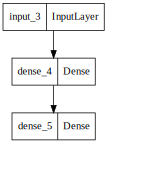

In [16]:
# Importação das bibliotecas necessárias
from IPython.display import SVG  # biblioteca para exibir a imagem SVG
from keras.utils.vis_utils import model_to_dot  # biblioteca para gerar o grafo de conexão

# Gera a imagem do grafo de conexão do modelo de autoencoder
# e converte em formato SVG
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))


In [19]:
# Define o número de épocas e o tamanho do batch para o treinamento
epochs = 10
batch_size = 128

# Treina o modelo de autoencoder com os dados de treinamento
# e armazena o histórico de treinamento em 'history'
history = autoencoder.fit(
    X_train,  # Dados de entrada para treinamento
    X_train,  # Rótulos de saída para treinamento (iguais aos dados de entrada)
    batch_size=batch_size,  # Tamanho do lote para o treinamento em cada iteração
    epochs=epochs,  # Número de épocas de treinamento
    verbose=1,  # Exibe informações de progresso durante o treinamento
    validation_data=(X_test, X_test)  # Dados de validação para avaliar o desempenho do modelo
)


Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0175 - val_loss: 0.0132
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0110 - val_loss: 0.0088
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0040

313/313 [==============================] - 0s 1ms/step


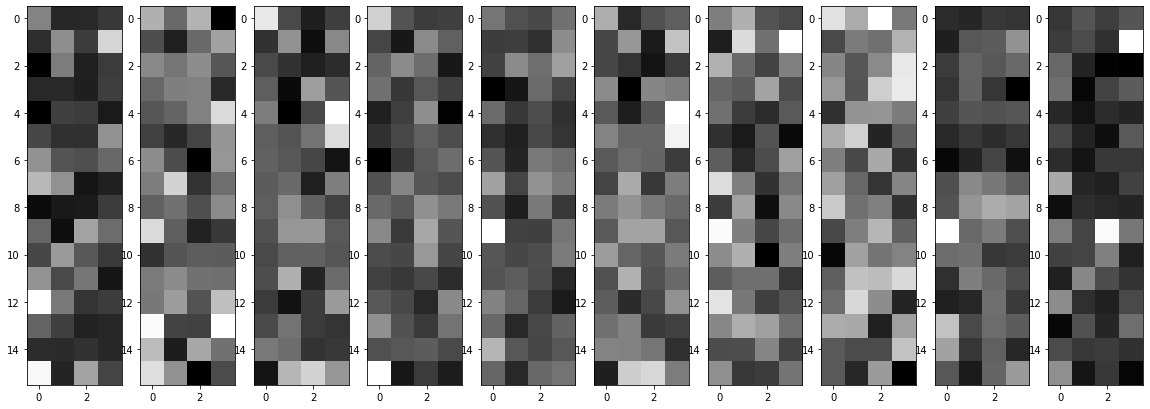

In [21]:
# Cria um modelo de codificador convolucional usando 'x' como entrada e 'h' como saída
conv_encoder = Model(x, h)

# Gera as imagens codificadas usando o modelo de codificador convolucional e os dados de teste
encoded_imgs = conv_encoder.predict(X_test)

# Define o número de imagens a serem exibidas e configura o tamanho da figura
n = 10
plt.figure(figsize=(20,8))

# Plota as imagens codificadas
for i in range(n):
    # Define o subplot e exibe a imagem codificada
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4,16).T)
    
    # Define a cor como escala de cinza
    plt.gray()
    
# Exibe a figura com as imagens codificadas
plt.show()


In [22]:
# Gera as imagens decodificadas usando o modelo de autoencoder e os dados de teste
decoded_imgs = autoencoder.predict(X_test)


313/313 [==============================] - 1s 3ms/step


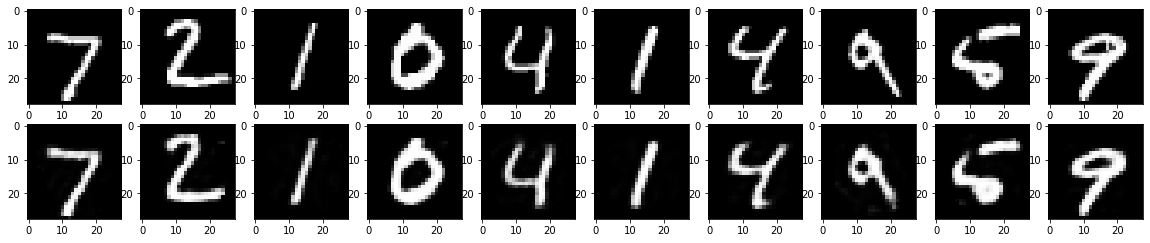

In [25]:
# Define o número de imagens a serem exibidas e configura o tamanho da figura
n = 10
plt.figure(figsize=(20,6))

# Plota as imagens originais e decodificadas
for i in range(n):
    # Define o subplot e exibe a imagem original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    
    # Define a cor como escala de cinza
    plt.gray()
    
    # Define o subplot e exibe a imagem decodificada
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    
    # Define a cor como escala de cinza
    plt.gray()

# Exibe a figura com as imagens originais e decodificadas
plt.show()


dict_keys(['loss', 'val_loss'])


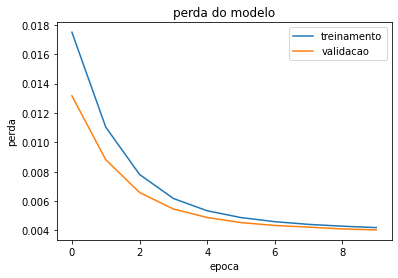

In [27]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('perda do modelo')
plt.ylabel('perda')
plt.xlabel('epoca')
plt.legend(['treinamento', 'validacao'], loc='upper right')
plt.show()